<a href="https://colab.research.google.com/github/FarshadBorjalizade/ImagePprocessing-ComputerVision/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import what we need

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load MNIST Dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.minst.load_data()

### check shapes and types

In [ ]:
type(train_data), train_data.dtype, train_data.shape

(numpy.ndarray, dtype('uint8'), (60000, 28, 28))

In [ ]:
type(train_labels), train_labels.dtype, train_labels.shape

(numpy.ndarray, dtype('uint8'), (60000,))

### check shapes and types of test data

In [ ]:
type(test_data), test_data.dtype, test_data.shape

(numpy.ndarray, dtype('uint8'), (10000, 28, 28))

In [ ]:
type(test_labels), test_labels.dtype, test_labels.shape

(numpy.ndarray, dtype('uint8'), (10000,))

### now lets plot some images

In [ ]:
train_labels[1]

0

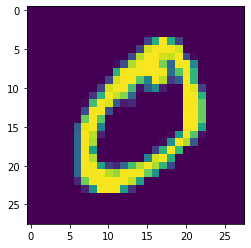

In [ ]:
plt.imshow(train_data[1])

In [ ]:
train_labels[0]

5

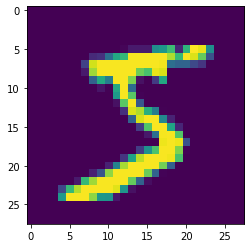

In [ ]:
plt.imshow(train_data[0])

# Reshape train and test data

In [ ]:
train_data = np.reshape(train_data, newshape=(-1, 28 * 28))
train_data.shape, train_data.dtype

((60000, 784), dtype('uint8'))

In [ ]:
test_data = np.reshape(test_data, newshape=(-1, 28 * 28))
test_data.shape, test_data.dtype

((10000, 784), dtype('uint8'))

# Convert labels to one-hot encoding
### essential for classification - use to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels, num_classes=10)
train_labels.shape, train_labels.dtype

((60000, 10), dtype('float32'))

### now see new one-hot labels

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels = to_categorical(test_labels, num_classes=10)
test_labels.shape, train_labels.dtype

((10000, 10), dtype('float32'))

# Normalize the data
### between 0 and 1 and float32 dtype

In [ ]:
train_data = train_data.astype('float32') / 255.0
train_data.shape, train_data.dtype

((60000, 784), dtype('float32'))

In [ ]:
test_data = test_data.astype('float32') / 255.0
test_data.shape, test_data.dtype

((10000, 784), dtype('float32'))

### check mean, min, max of data

In [ ]:
train_data.mean()

0.13066062

In [ ]:
test_data.mean()

0.13251467

## last final check of all shapes

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

## Use some portion of data if you want

In [ ]:
train_data = train_data[:10000]
train_labels = train_labels[:10000]
train_data.shape, train_labels.shape

((10000, 784), (10000, 10))

In [ ]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

# Create Our Classification Model

### Import layers and models

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

## Create the model

In [ ]:
input_layer = Input(shape=(784,))
x = Dense(units=512, activation='relu')(input_layer)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
predictions = Dense(units=10, activation='softmax')(x)

my_first_classifier_model = Model(inputs=input_layer, outputs=predictions)

### print summary of the model

In [ ]:
my_first_classifier_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# Compile the model
## With optimizer and loss function
## This time we use another metric as well

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
my_first_classifier_model.compile(optimizer=Adam(learning_rate=0.0001),
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

## Now we can train the model

In [ ]:
my_first_classifier_model.fit(x=train_data, y=train_labels,
                              batch_size=32, epochs=50, shuffle=True,
                              validation_data=(test_data, test_labels))


Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 3s 285us/sample - loss: 0.8575 - accuracy: 0.7911 - val_loss: 0.3621 - val_accuracy: 0.9016
Epoch 2/50
10000/10000 [==============================] - 3s 250us/sample - loss: 0.2931 - accuracy: 0.9198 - val_loss: 0.2783 - val_accuracy: 0.9217
Epoch 3/50
10000/10000 [==============================] - 3s 252us/sample - loss: 0.2208 - accuracy: 0.9373 - val_loss: 0.2345 - val_accuracy: 0.9342
Epoch 4/50
10000/10000 [==============================] - 3s 271us/sample - loss: 0.1772 - accuracy: 0.9518 - val_loss: 0.2128 - val_accuracy: 0.9370
Epoch 5/50
10000/10000 [==============================] - 3s 262us/sample - loss: 0.1441 - accuracy: 0.9587 - val_loss: 0.2134 - val_accuracy: 0.9343
Epoch 6/50
10000/10000 [==============================] - 3s 253us/sample - loss: 0.1200 - accuracy: 0.9674 - val_loss: 0.1968 - val_accuracy: 0.9415
Epoch 7/50
10000/10000 [==========================

### plot model loss history

In [ ]:
model_loss_history = pd.DataFrame({'loss': my_first_classifier_model.history.history['loss'],
                             'val_loss': my_first_classifier_model.history.history['val_loss']})

<AxesSubplot:>

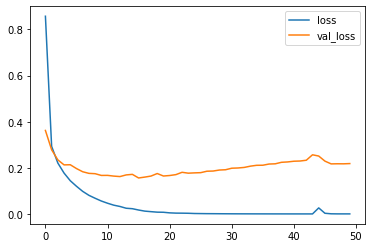

In [ ]:
model_loss_history.plot()

### min of validation loss

In [ ]:
model_loss_history['val_loss'].min()

0.15596061082412488

### plot model accuracy history

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': my_first_classifier_model.history.history['accuracy'],
                                       'val_accuracy': my_first_classifier_model.history.history['val_accuracy']})

<AxesSubplot:>

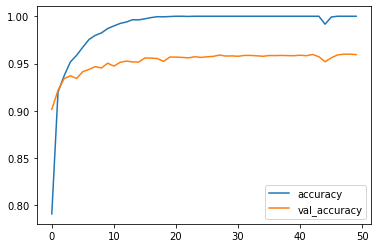

In [ ]:
model_accuracy_history.plot()

### max of validation accuracy

In [ ]:
model_accuracy_history['val_accuracy'].max()

0.9599000215530396

## Evaluate the model

In [ ]:
my_first_classifier_model.evaluate(x=test_data, y=test_labels)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.2184 - accuracy: 0.9595


[0.21840731651980422, 0.9595]

# Create Another Model with Dropout Layer

## Import Dropout layer

In [ ]:
from tensorflow.keras.layers import Dropout

## Create second model with Dropout

In [ ]:
input_layer = Input(shape=(784,))
x = Dense(units=512, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(units=10, activation='softmax')(x)

my_second_classifier_model = Model(inputs=input_layer, outputs=predictions)

### print summary of the model

In [ ]:
my_second_classifier_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0   

## Compile the model with optimizer, loss function and accuracy metric

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
my_second_classifier_model.compile(optimizer=Adam(learning_rate=0.0001),
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

## Now we can train our model

In [ ]:
my_second_classifier_model.fit(x=train_data, y=train_labels,
                              batch_size=32, epochs=50, shuffle=True,
                              validation_data=(test_data, test_labels))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 3s 310us/sample - loss: 1.4807 - accuracy: 0.5374 - val_loss: 0.5605 - val_accuracy: 0.8438
Epoch 2/50
10000/10000 [==============================] - 3s 271us/sample - loss: 0.6319 - accuracy: 0.8095 - val_loss: 0.3587 - val_accuracy: 0.8981
Epoch 3/50
10000/10000 [==============================] - 3s 270us/sample - loss: 0.4622 - accuracy: 0.8650 - val_loss: 0.2976 - val_accuracy: 0.9121
Epoch 4/50
10000/10000 [==============================] - 3s 276us/sample - loss: 0.3755 - accuracy: 0.8905 - val_loss: 0.2615 - val_accuracy: 0.9229
Epoch 5/50
10000/10000 [==============================] - 3s 290us/sample - loss: 0.3197 - accuracy: 0.9070 - val_loss: 0.2427 - val_accuracy: 0.9273
Epoch 6/50
10000/10000 [==============================] - 3s 263us/sample - loss: 0.2745 - accuracy: 0.9183 - val_loss: 0.2224 - val_accuracy: 0.9335
Epoch 7/50
10000/10000 [==========================

### Plot model loss history

In [ ]:
model_loss_history = pd.DataFrame({'loss': my_second_classifier_model.history.history['loss'],
                                   'val_loss': my_second_classifier_model.history.history['val_loss']})

<AxesSubplot:>

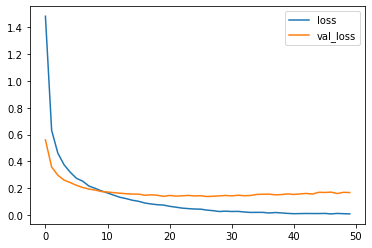

In [ ]:
model_loss_history.plot()

### min of model validation loss history

In [ ]:
model_loss_history['val_loss'].min()

0.139196775612334

### plot model accuracy history

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': my_second_classifier_model.history.history['accuracy'],
                                       'val_accuracy': my_second_classifier_model.history.history['val_accuracy']})

<AxesSubplot:>

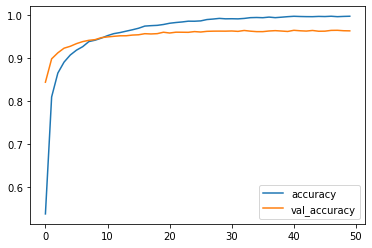

In [ ]:
model_accuracy_history.plot()

### max of model validation accuracy

In [ ]:
model_accuracy_history['val_accuracy'].max()

0.9645000100135803

## Evaluate the model

In [ ]:
my_second_classifier_model.evaluate(x=test_data, y=test_labels)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.1687 - accuracy: 0.9632


[0.16870401106315439, 0.9632]